# This is my first Jupyter notebook.  
I am exploring energy monitoring.  Also, I am fairly new to Python...
This notebook reads Tisham's data from ThingSpeak and then puts the data into a CSV file (power in watts , date and time).

## Get Tisham's data from ThingSpeak.  
Tisham kindly gave me a link to a Notebook he wrote that gets data from ThingSpeak.  I started here: 
I don't have the thingspeak library.  Guess I need to get it before I try to import.  I didn't know about ThingSpeak.  I guess it is tightly coupled with Mathworks.  Whatever that is.  I think it is used by academics?
- pip install thingspeak (see here: https://pypi.python.org/pypi/thingspeak/0.4.1


In [6]:
import thingspeak

channel_id = 257084
read_key    = "UHD7GTZLM9JIHG36"

channel = thingspeak.Channel(id=channel_id,api_key=read_key)

series_json = None
num_result = 8000

try:
    # Get the last 10K power readings
    series_json = channel.get_field(field='field2', options = {'results': num_result})
except:
    raise
    print ("connection failed")

In [7]:
import json
data = json.loads(series_json)

### Learnings...
Initially I got- NameError: name 'datetime' is not defined.  
- added import datetime
Next- NameError: name 'np' is not defined
- added import numpy as np

In [8]:
import datetime
import numpy as np
x = list()
y = list()
for entry in data['feeds']:
    y.append(-float(entry[u'field2']))
    x.append(datetime.datetime.strptime(entry[u'created_at'],'%Y-%m-%dT%H:%M:%SZ'))
power = np.array(y)
times = np.array(x)


## Put data into a csv file where each row is power , times
### Learnings
- column_stack is a nifty numpy function!
- then savetxt put the power and times into a csv file.

In [9]:
powerAndTimes = np.column_stack((y,x))
np.savetxt('powerAndTimes.csv',powerAndTimes,fmt='%s',delimiter=',')


### Learnings...
First time run - NameError: name 'pyplot' is not defined.  
- added from matplotlib import pyplot
- mucked a bit with the pyplot command so that it quickly showed a plot of energy use over time.

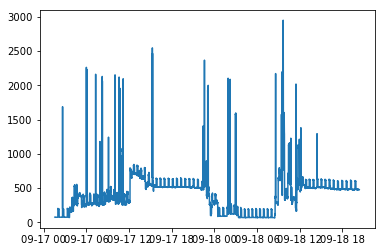

In [10]:
from matplotlib import pyplot
pyplot.plot(times,power)
pyplot.show()